In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


In [3]:
os.getcwd()

'/home/humble-fool/school_work/Spring_18/Data-Science-Lab-ee379k/lab3/src'

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d376102e8>,
      dtype=object)

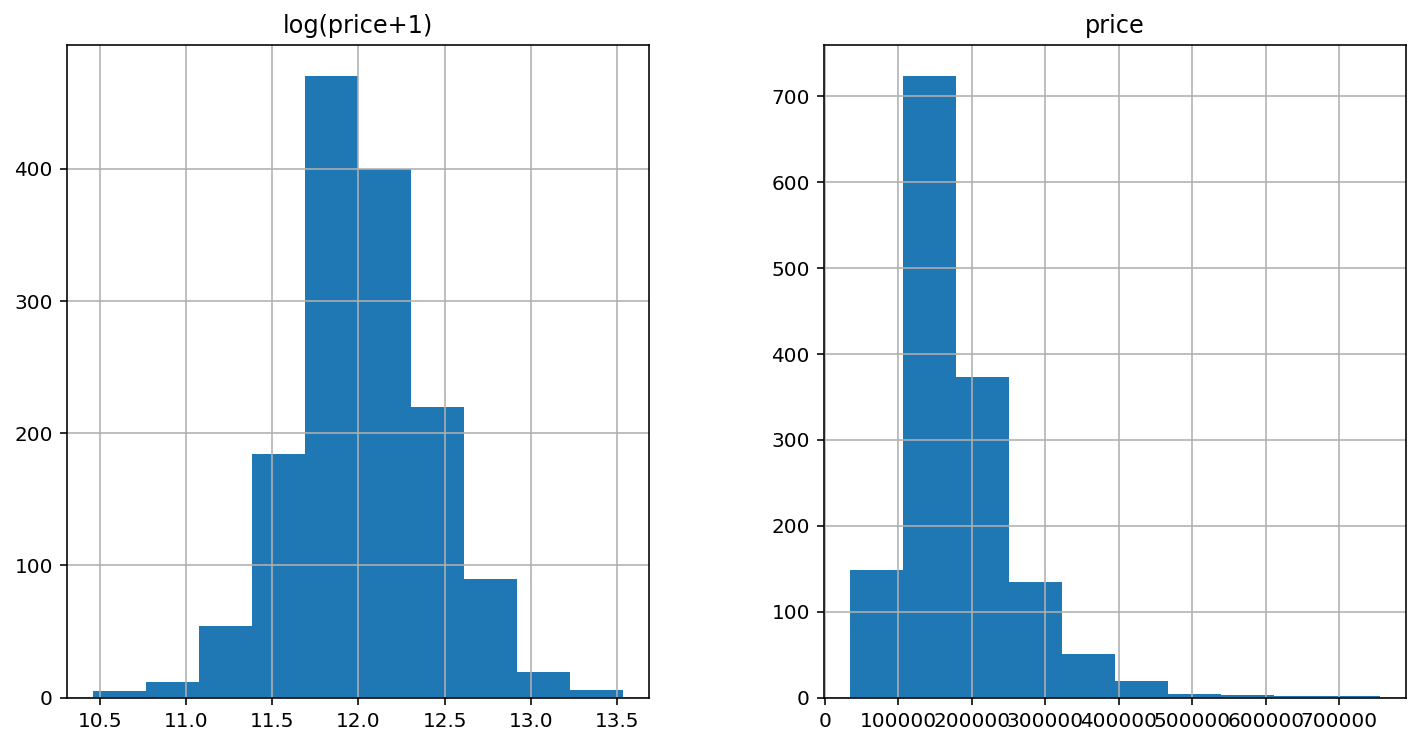

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
prices = pd.DataFrame({'price':train["SalePrice"],"log(price+1)":np.log1p(train["SalePrice"])})
prices.hist()

In [10]:
train['SalePrice'] = np.log1p(train["SalePrice"])

numeric_feats = all_data.dtypes[(all_data.dtypes != 'object')].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats>0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [11]:
all_data = pd.get_dummies(all_data)

all_data = all_data.fillna(all_data.mean())

In [12]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

model = Ridge(alpha = 0.1)
model.fit(X_train,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
arr = np.expm1(model.predict(X_test))
print(len(arr))
pd.DataFrame(arr).to_csv("kaggle_results.csv")


1459


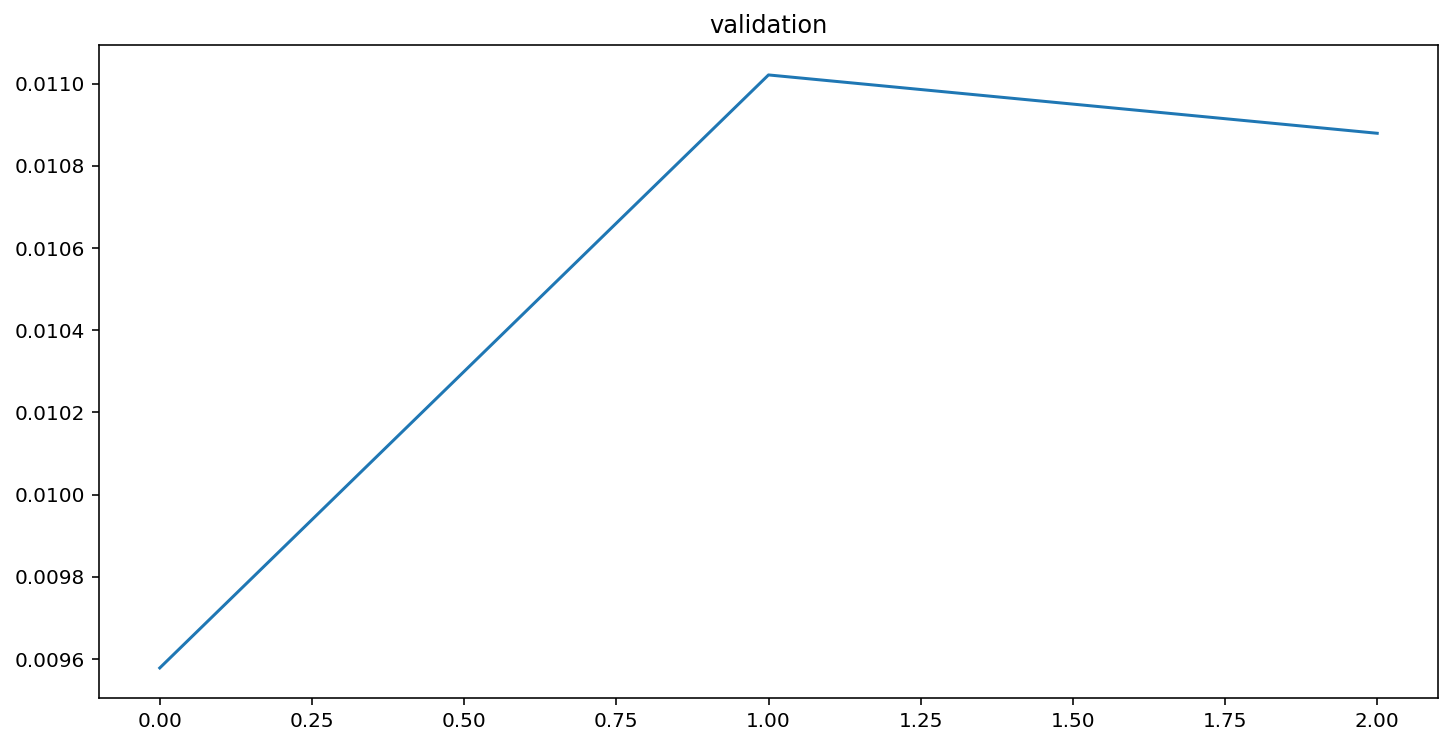

In [16]:
cv_ridge = pd.Series(rmse)
cv_ridge.plot(title = "validation")
